In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("E:\Data sets\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
#directly use label encoding using dictionary to convert to 0 and 1
df["Category"].replace({"ham":0, "spam":1}, inplace=True)

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [11]:
df['Message'] =  [str(x) for x in df ['Message']]
df["Message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
X= df["Message"]
y= df["Category"]

In [13]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [14]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(3733,)

In [18]:
X_test.shape

(1839,)

In [19]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

In [111]:
X_train_vect= vectorizer.fit_transform(X_train)
X_train_vect

<3733x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 49971 stored elements in Compressed Sparse Row format>

In [112]:
X_train_vect.toarray().shape

(3733, 7081)

# using BernoulliNB

In [113]:
from sklearn.naive_bayes import BernoulliNB

In [114]:
model = BernoulliNB()

In [115]:
model.fit(X_train_vect,y_train)

BernoulliNB()

In [116]:
X_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
4944    Check mail.i have mailed varma and kept copy t...
3313    I know you are serving. I mean what are you do...
3652         Want to send me a virtual hug?... I need one
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
4758    hey, looks like I was wrong and one of the kap...
Name: Message, Length: 1839, dtype: object

In [23]:
X_test_vect= vectorizer.transform(X_test)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
X_test_vect.toarray()

In [119]:
model.score(X_test_vect,y_test)

0.9787928221859706

In [120]:
emails= ['Hey john,can we get together to watch football game tomorrow?',
        'upto 20% discount on parking, exclusive offer just for you.Dont miss this chance',
        'Get a FREE hoodie by calling 8845545 t&c apply ']

In [121]:
email_vect = vectorizer.transform(emails)

In [122]:
email_vect

<3x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [152]:
email_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [141]:
model.predict(email_vect)
#it predicted the wrong output

array([0, 0, 0], dtype=int64)

#  run using multinomial NB

In [142]:
from sklearn.naive_bayes import MultinomialNB

In [143]:
mnb= MultinomialNB()
mnb.fit(X_train_vect,y_train)
mnb.score(X_test_vect,y_test)

0.9902120717781403

In [144]:
mnb.predict(email_vect)

array([0, 1, 1], dtype=int64)

# Pipeline

In [145]:
from sklearn.pipeline import Pipeline

In [146]:
clf= Pipeline([('vectorizer',CountVectorizer()), ('mnb', MultinomialNB())])

In [147]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [148]:
 clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [149]:
X_train.head()

3235                                  Yup ü not comin :-(
945     I sent my scores to sophas and i had to do sec...
5319                         Kothi print out marandratha.
5528    Its just the effect of irritation. Just ignore it
247                        I asked you to call him now ok
Name: Message, dtype: object

In [150]:
clf.score(X_test,y_test)

0.9902120717781403

In [151]:
clf.predict(emails)

array([0, 1, 1], dtype=int64)

In [153]:
#to get the unique names that has been taken
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zoom', 'zouk', 'èn'], dtype=object)

In [155]:
y_pred= clf.predict(X_test)

In [156]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
from sklearn.metrics import confusion_matrix

In [159]:
cm = confusion_matrix(y_test,y_pred)

In [160]:
cm

array([[1587,    6],
       [  12,  234]], dtype=int64)

In [161]:
import seaborn as sns

<Axes: >

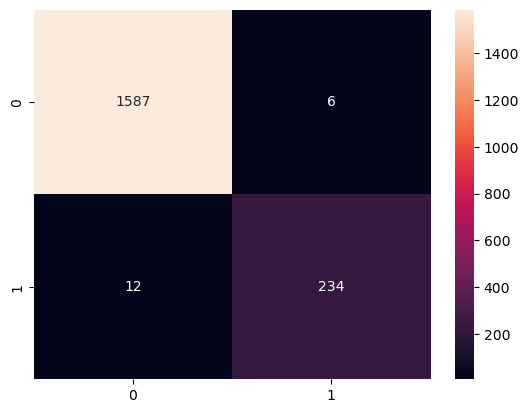

In [165]:
sns.heatmap(cm,annot=True,fmt='d')